In [1]:
import tensorflow
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization, ZeroPadding2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import LeakyReLU, ELU
from tensorflow.keras.initializers import he_uniform
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
train_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)
test_data = image.ImageDataGenerator(rescale = 1./255,
                                    featurewise_center=True, 
                                    samplewise_center=True, 
                                    featurewise_std_normalization=True, 
                                    samplewise_std_normalization=True, 
                                    zca_whitening=False, zca_epsilon=1e-06, 
                                    rotation_range=40, width_shift_range=0.0,
                                    height_shift_range=0.0, brightness_range=(0.2, 0.2),
                                    shear_range=0.2, zoom_range=0.2, 
                                    channel_shift_range=0.0, fill_mode='nearest', 
                                    cval=0.0, horizontal_flip=True, vertical_flip=True,
                                    data_format=None, validation_split=0.0, dtype=None)

In [3]:
test = train_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\test\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical', batch_size=64, seed=1)
train = test_data.flow_from_directory(r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\train\\",
                                     target_size=(48, 48), classes = [str(x) for x in range(100)],
                                     class_mode='categorical',batch_size=64,seed=1)

Found 1000 images belonging to 100 classes.
Found 8900 images belonging to 100 classes.


In [4]:
def model_creation():
    
    model = Sequential()
    
    model.add(ZeroPadding2D(padding = (2, 2), input_shape= (48, 48, 3), name="zeropad1"))
    #model.add(Conv2D(4, kernel_size=(2, 2), name='conv0'))
    model.add(Conv2D(8,kernel_size=(5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.01),kernel_initializer=he_uniform(seed=2) ,name="conv1"))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME', name="maxpool1"))
    model.add(BatchNormalization(axis = -1))
    model.add(Dropout(0.5))
    model.add(Conv2D(16, kernel_size=(5, 5), activation='relu', kernel_initializer=he_uniform(seed=2), name="conv2"))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01), kernel_initializer=he_uniform(seed=2), name="conv3"))
    #model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME', name='maxpool2'))
    model.add(BatchNormalization(axis = -1))
    
    model.add(Flatten())
    
    model.add(Dense(1024, activation='relu' ,kernel_regularizer=regularizers.l2(0.01),kernel_initializer=he_uniform(seed=2), name='dense1'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', name='dense2'))
    model.add(Dense(100, activation="softmax", name='dense3'))
    
    return model

model = model_creation()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zeropad1 (ZeroPadding2D)     (None, 52, 52, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 8)         608       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 48, 48, 8)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 8)         32        
_________________________________________________________________
dropout (Dropout)            (None, 48, 48, 8)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 44, 44, 16)        3216      
_________________________________________________________________
conv3 (Conv2D)               (None, 42, 42, 32)        4

In [5]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit_generator(train, steps_per_epoch=200,
                    epochs=5, validation_data=test,
                    validation_steps=80, verbose=1)

Epoch 1/5
200/200 [==============================] - 114s 568ms/step - loss: 24.8546 - accuracy: 0.0878 - val_loss: 23.1612 - val_accuracy: 0.2094
Epoch 2/5
200/200 [==============================] - 110s 552ms/step - loss: 22.5118 - accuracy: 0.1960 - val_loss: 21.3355 - val_accuracy: 0.2764
Epoch 3/5
200/200 [==============================] - 110s 551ms/step - loss: 20.7622 - accuracy: 0.2590 - val_loss: 19.9253 - val_accuracy: 0.3094
Epoch 4/5
200/200 [==============================] - 111s 553ms/step - loss: 19.1650 - accuracy: 0.3110 - val_loss: 18.5198 - val_accuracy: 0.3242
Epoch 5/5
200/200 [==============================] - 110s 552ms/step - loss: 17.8203 - accuracy: 0.3416 - val_loss: 17.1961 - val_accuracy: 0.3784


In [7]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<Figure size 640x480 with 1 Axes>

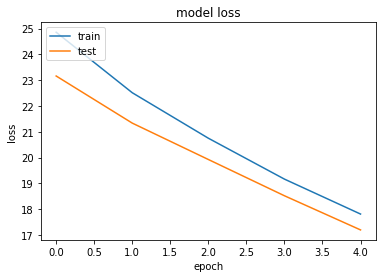

In [8]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [9]:
#Evaluating Model
score  = model.evaluate_generator(test,steps = 100)
#printAccuracy
print("Accuracyloss:-", score[0])
print("AccuracyScore",score[1] )

Accuracyloss:- 17.203184776306152
AccuracyScore 0.38475063


In [10]:
import os
model.save(os.getcwd()+"//"+"weights_new.h5")

In [11]:
from tensorflow.keras.models import load_model
import os

In [12]:
Y_pred = model.predict_generator(test, 1000 //64+1)
print(Y_pred)

[[8.0520508e-04 3.8742932e-04 1.7287901e-03 ... 3.0097961e-03
  1.4534199e-03 6.7764377e-05]
 [9.4983487e-05 1.4873462e-04 7.0984592e-04 ... 8.1764034e-04
  2.2361355e-06 9.3661062e-04]
 [4.4184828e-05 1.1679264e-05 5.6040960e-07 ... 1.0964651e-04
  2.8506082e-09 2.0604624e-01]
 ...
 [3.4392750e-07 6.2060892e-05 3.6843710e-05 ... 2.3964487e-05
  1.2788424e-05 9.6295594e-08]
 [2.8750153e-09 4.6611494e-05 5.2188752e-05 ... 1.5131502e-06
  1.3559265e-06 1.4089544e-07]
 [6.5190347e-06 4.3856041e-03 6.7999317e-05 ... 3.6627511e-03
  1.7075425e-04 1.1343805e-05]]


In [13]:
model = load_model(os.getcwd()+"//"+"weights_new.h5")

In [14]:
import numpy as np
y_pred = np.argmax(Y_pred, axis=1)

#len(y_pred)

print("Validation ", len(test.classes))

for i in range(len(test.classes)):
    pass
    #print(test.classes[i])

Validation  1000


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Confusion Matrix
AxesSubplot(0.125,0.125;0.62x0.755)


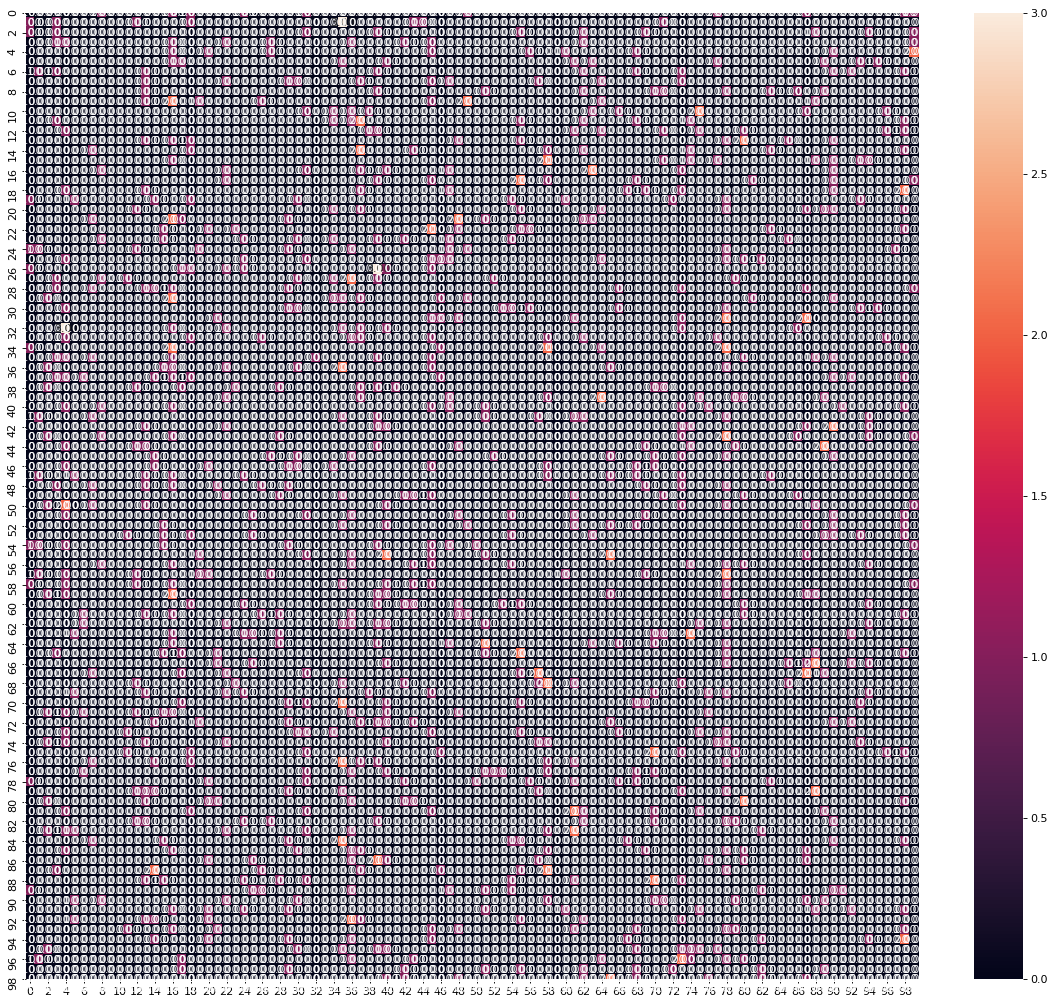

In [16]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 16), dpi=80, facecolor='w', edgecolor='k')

print('Confusion Matrix')
print(sns.heatmap(confusion_matrix(test.classes, y_pred), fmt='.2f', annot=True))

In [17]:
print(confusion_matrix(test.classes, y_pred))

[[0 0 0 ... 0 1 1]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]


In [18]:
print('Classification Report')
target_names = [str(x) for x in range(100)]
print(classification_report(test.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        10
           3       0.08      0.10      0.09        10
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.00      0.00      0.00        10
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00        10
          13       0.05      0.10      0.07        10
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        10
          16       0.00      0.00      0.00        10
     

In [19]:
from tensorflow.keras.models import Model
from PIL import Image
layer_outputs = [layer.output for layer in model.layers[:len(model.layers)]]
#image = cv2.imread("002_201.jpg")
activation_model = Model(inputs=model.input, outputs=layer_outputs)
im = Image.open("002_201.jpg") 
img = im.resize((48, 48))
img = img.save("predict_image.jpg")

In [20]:
image_show = Image.open("002_201.jpg")
image_show.show()

In [21]:
pred_img = image.load_img("predict_image.jpg",target_size=(48, 48))
data_batch = np.asarray(pred_img).reshape((-1, 48, 48,3 )).astype(float)
activations = activation_model.predict(data_batch)

In [22]:
import cv2
final_img = cv2.imread("predict_image.jpg")
#final_img = cv2.cvtColor(final_img)
final_img = np.asarray(final_img).reshape((-1, 48, 48,3)).astype(float)
final_pred = model.predict(final_img)

In [23]:
final_img_test = cv2.imread("predict_image.jpg")
final_img_test = cv2.cvtColor(final_img_test, cv2.COLOR_RGB2GRAY)

In [24]:
len(final_img_test.flatten())

2304

In [25]:
print("Test image Probabilites...........")
#print(final_pred)
test_image = final_pred.argmax(axis=-1)
test_image

Test image Probabilites...........


array([93], dtype=int64)

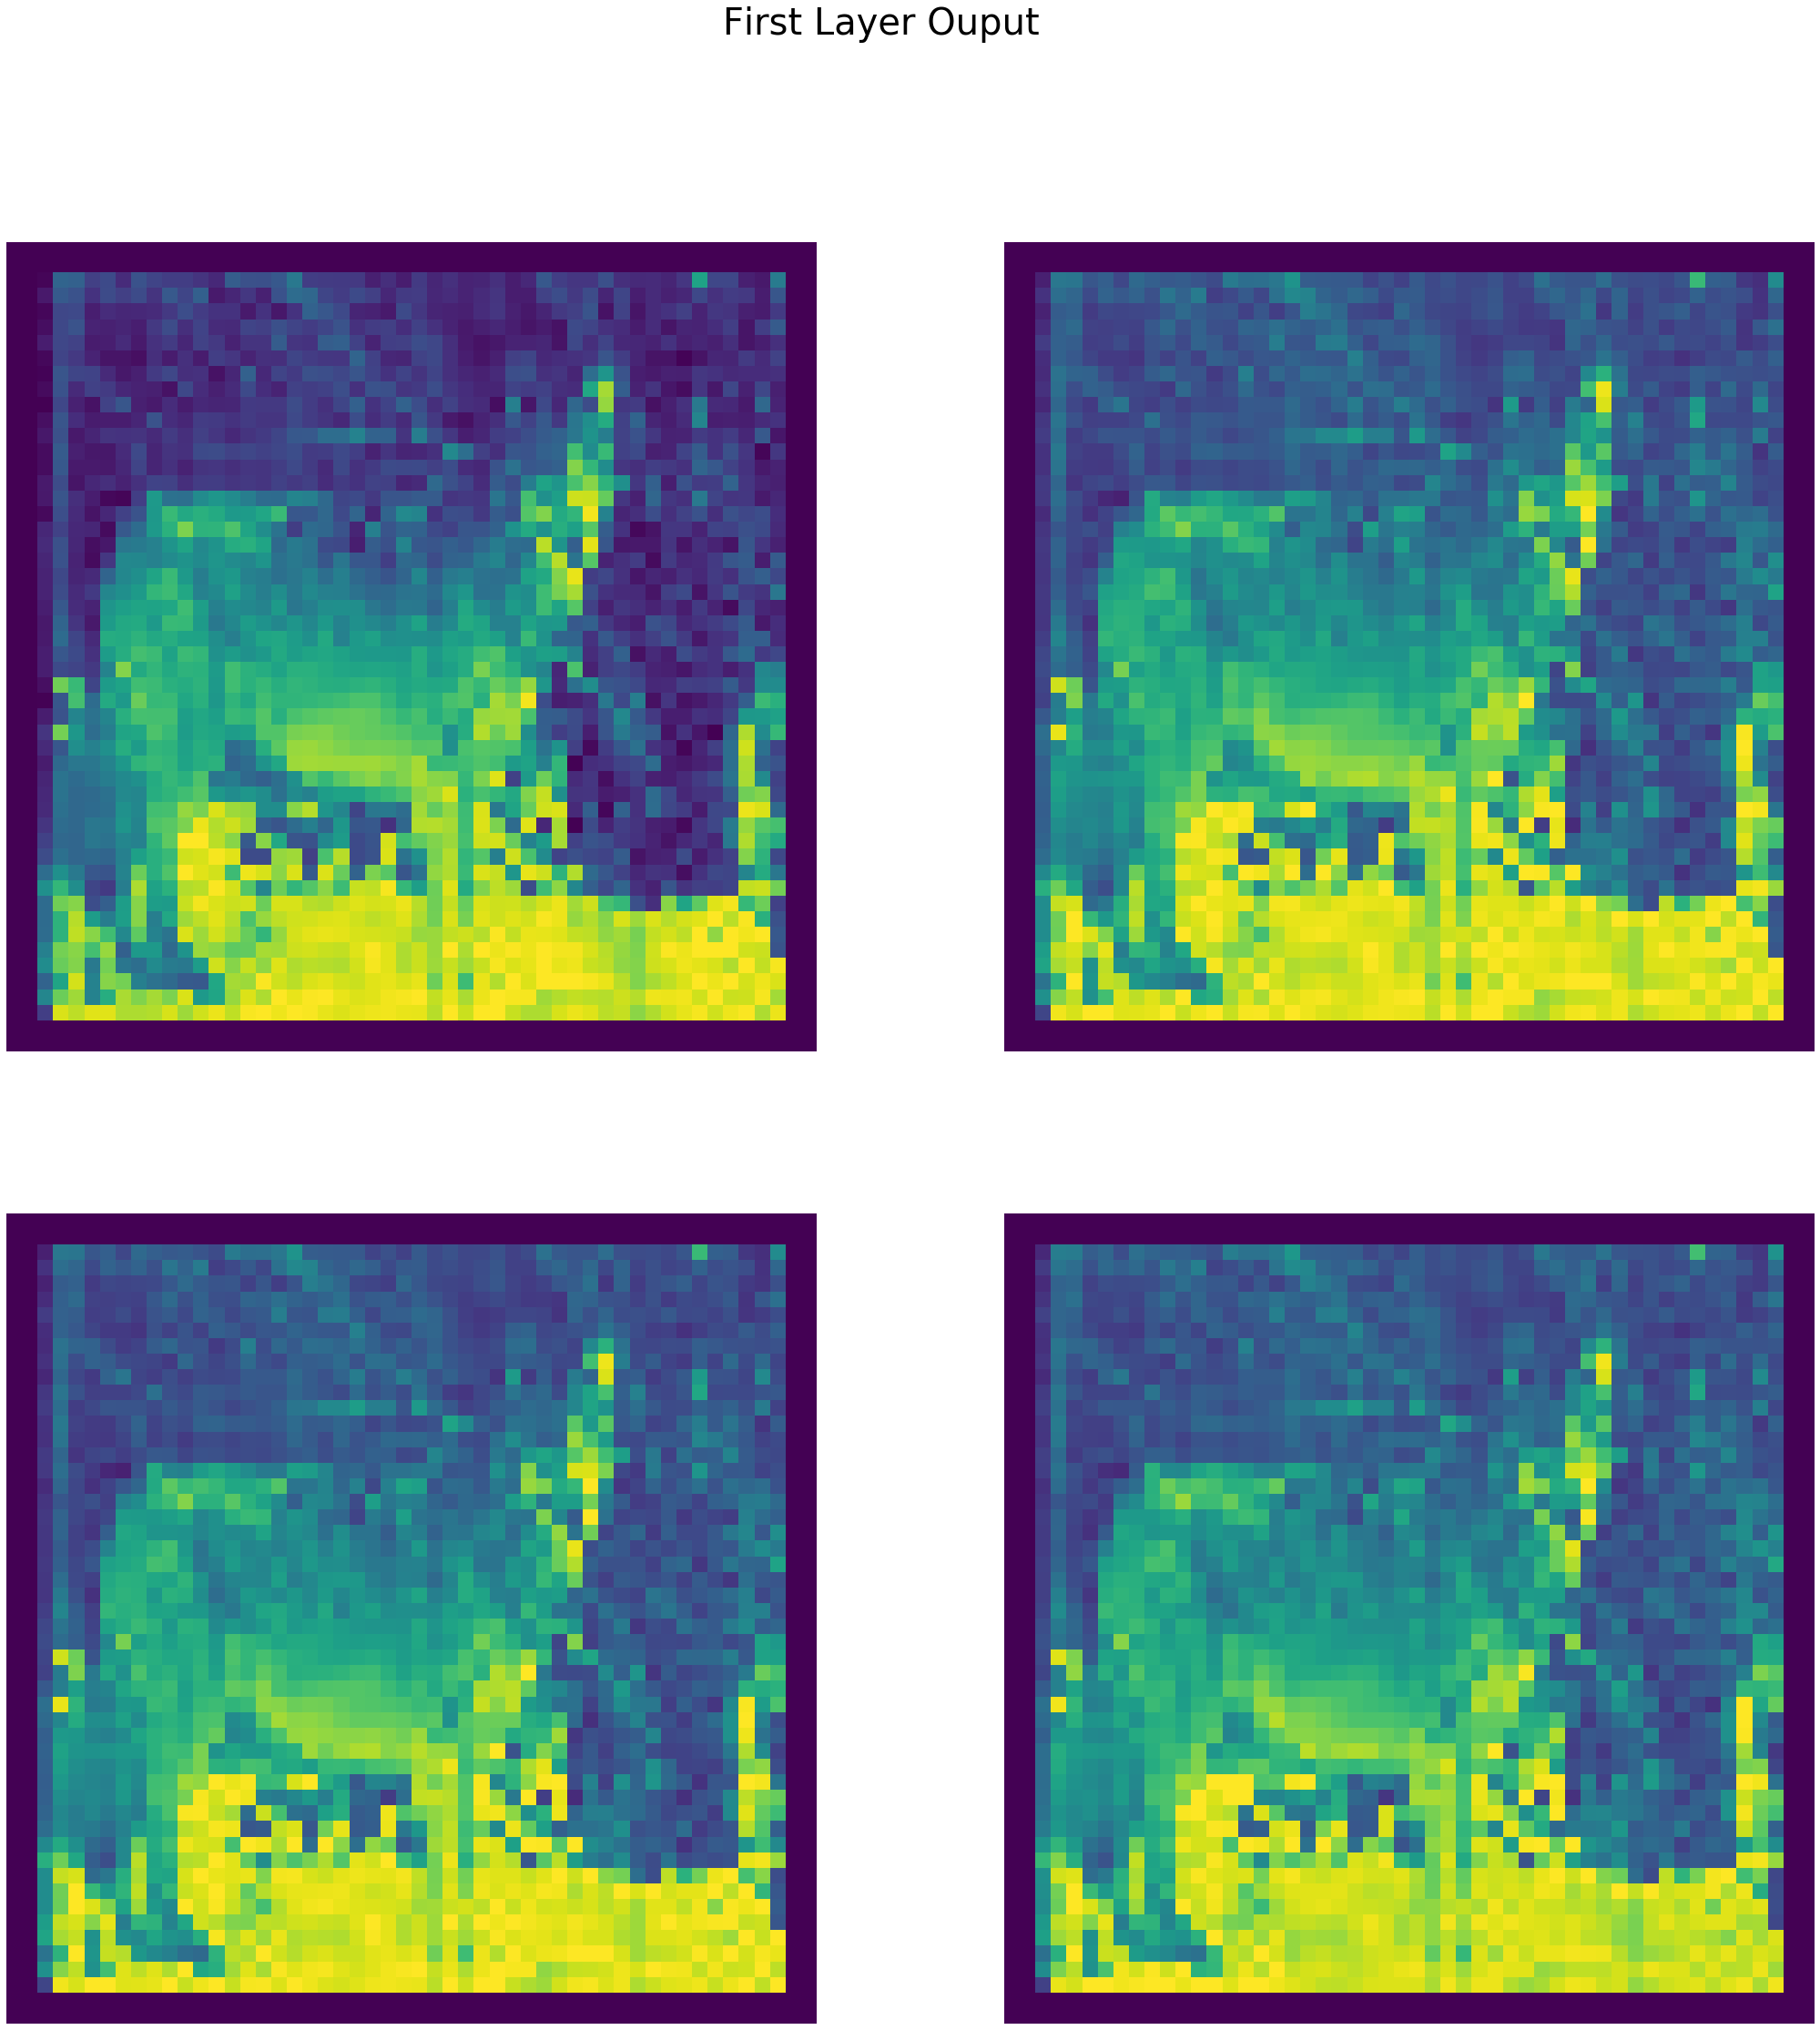

In [26]:
fig,ax=plt.subplots(2,2,figsize=(36,36))
for i in range(2):
    for j in range(2):
        #print("j=========", j)
        #print("i+j========", i+j)
        if (i+j)<32:
            first_layer_activation = activations[0]
            ax[i][j].imshow(first_layer_activation[0,:,:,i+j],)
            ax[i][j].axis("off")
        else:
            ax[i][j].set_visible(False)

plt.suptitle("First Layer Ouput",fontsize=40)
plt.show()

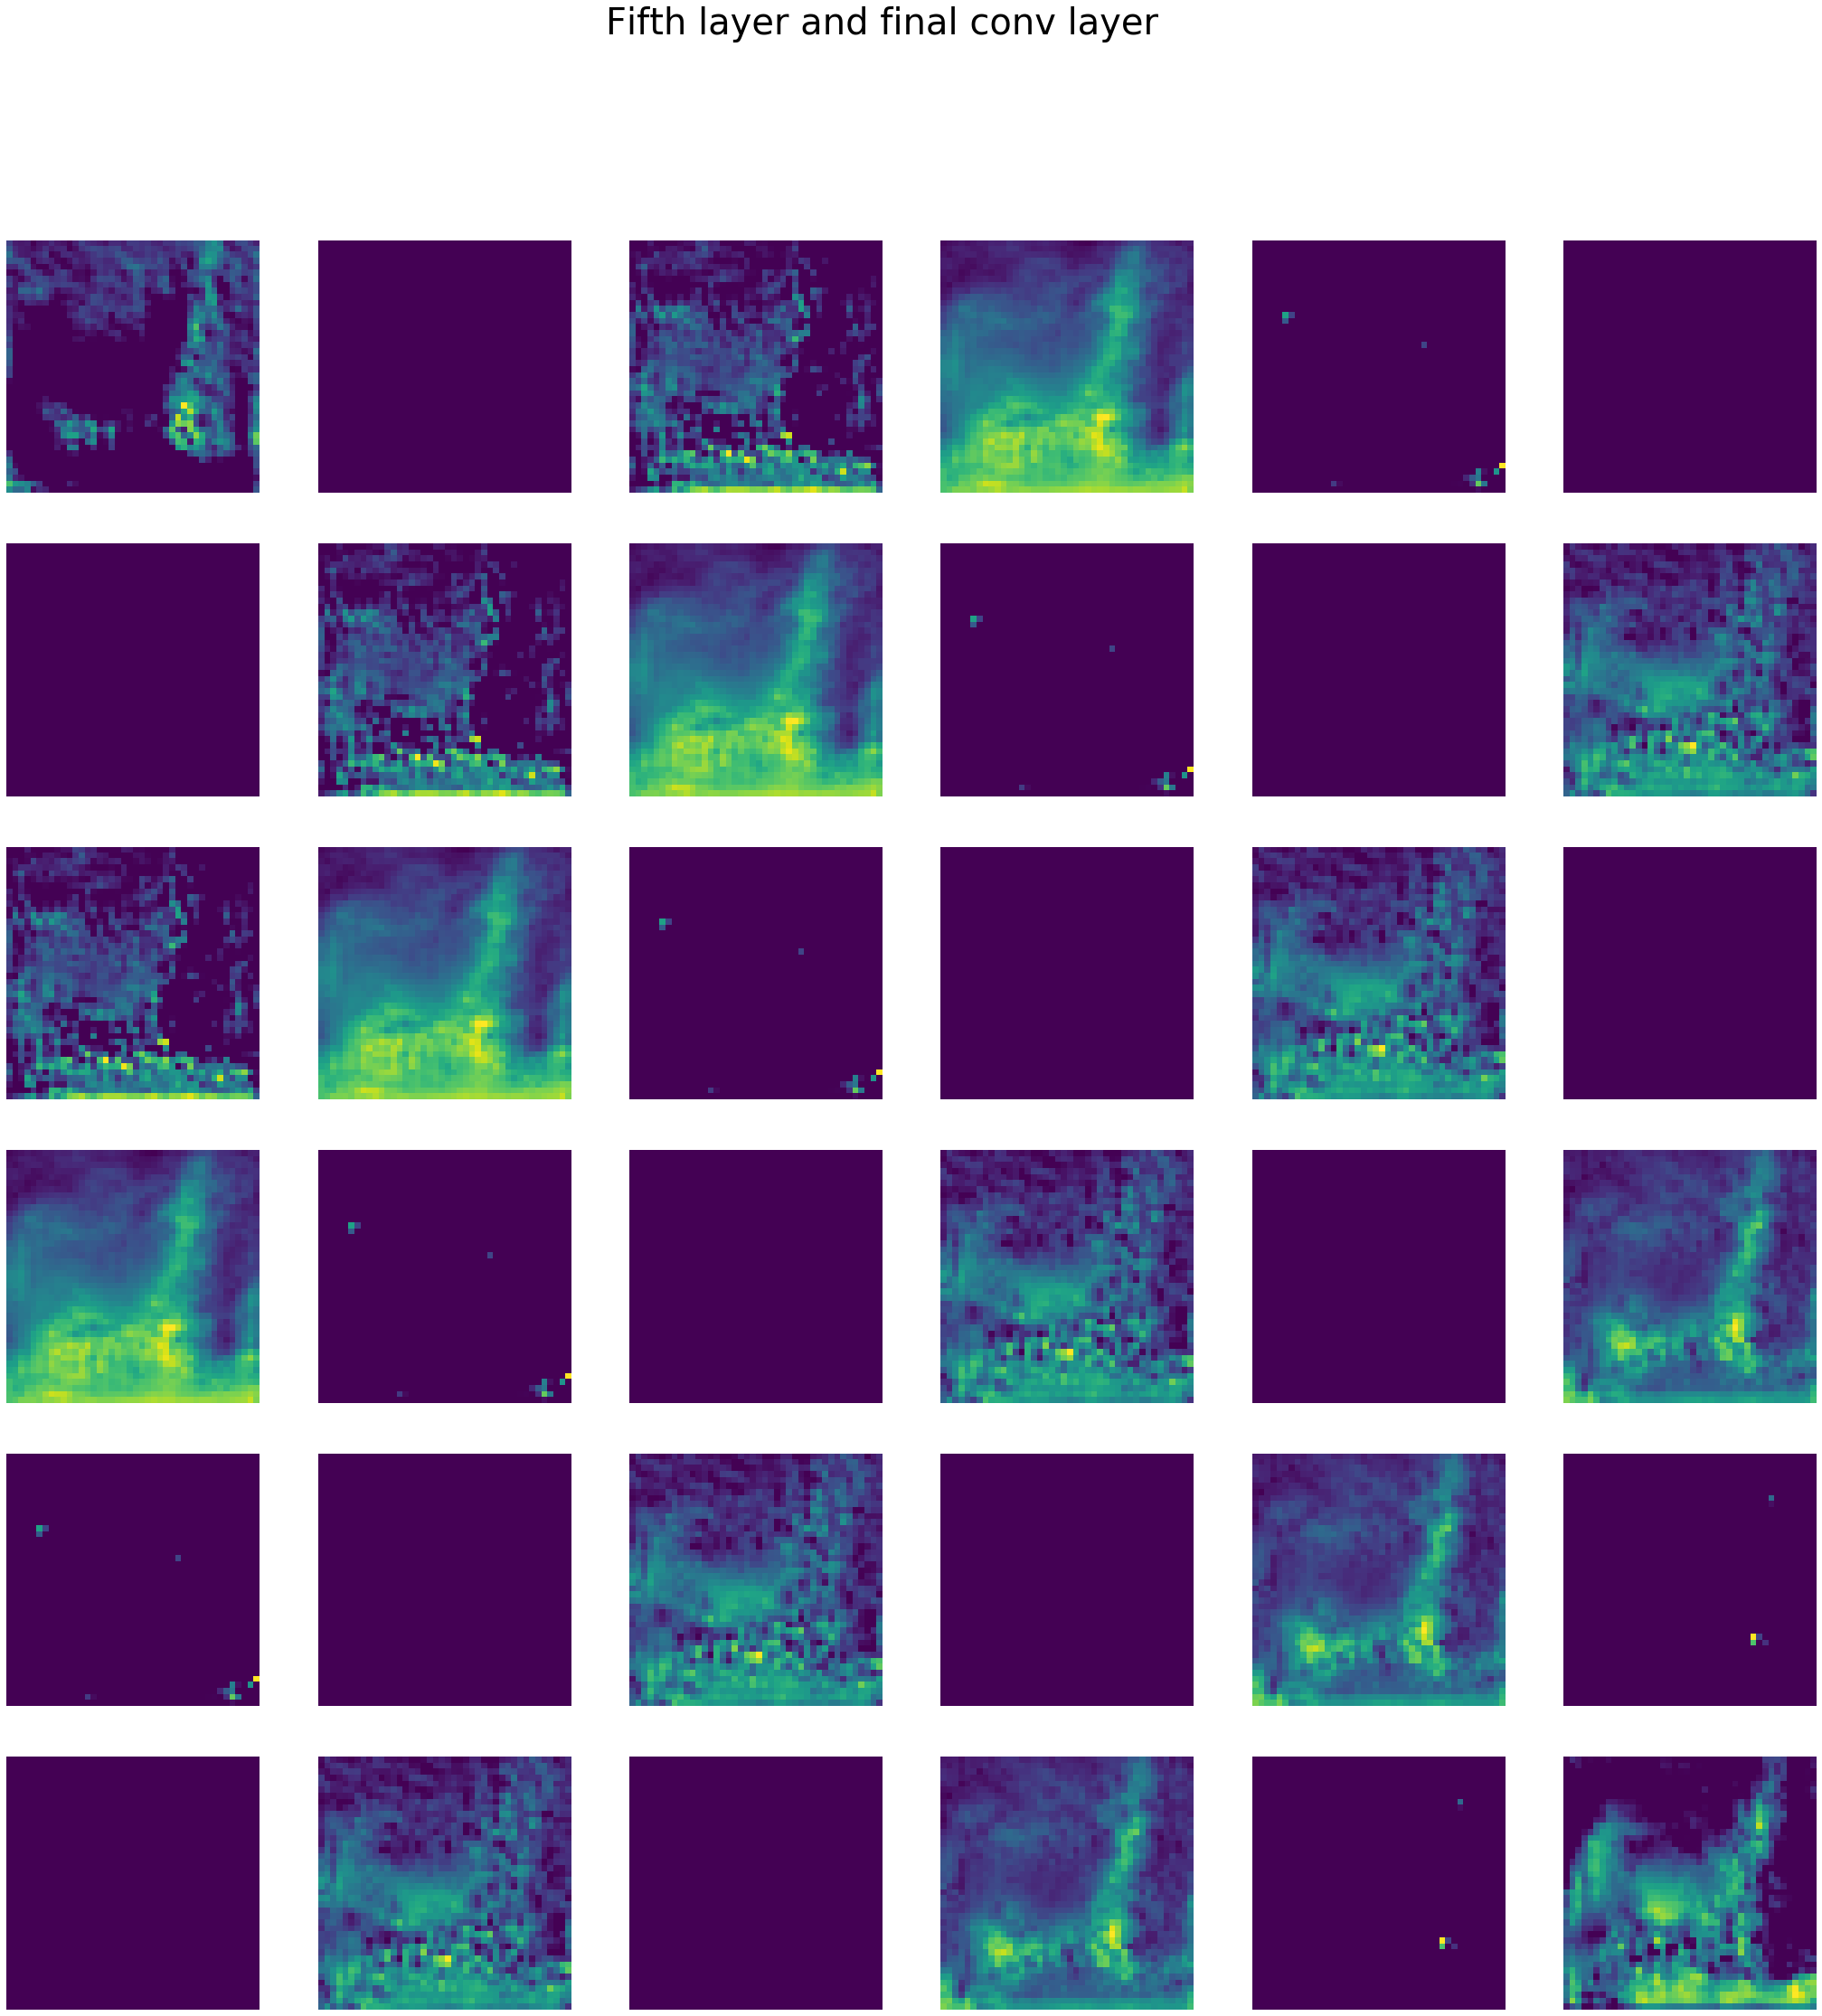

In [27]:

lists = []

fig,ax=plt.subplots(6,6,figsize=(36,36))
for i in range(6):
    for j in range(6):
        #print("j=========", j)
        #print("i+j========", i+j)
        if (i+j)<32:
            first_layer_activation = activations[-6]
            ax[i][j].imshow(first_layer_activation[0,:,:,i+j],)
            lists.append(first_layer_activation[0,:,:,i+j])
            ax[i][j].axis("off")
        else:
            ax[i][j].set_visible(False)

plt.suptitle("Fifth layer and final conv layer",fontsize=40)
plt.show()

# Distances With Euclidean Distance

In [28]:
from tensorflow.keras import backend as K
def euclidean_distance(x, y):
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

In [29]:


def distances_(lists):
    distances = []
    dict_dist = {}
    for i in range(len(lists)):
        arr_fe = np.array(lists[i])
        arr_fe = arr_fe.reshape(42, 42, 1)
        #print(arr_fe.shape)
        #plt.imshow(arr_fe)
        resized = cv2.resize(arr_fe, (48, 48), interpolation = cv2.INTER_CUBIC)

        x =  resized.flatten().reshape(48*48, 1)
        y = (final_img_test.flatten().reshape(48*48, 1))/255

        #print(x, y)
        distance = euclidean_distance(x, y).numpy()
        #print(distance)
        #print(sum(distance)/len(distance))
        distances.append((sum(distance)/len(distance))[0])
        dict_dist[i] = [(sum(distance)/len(distance))[0]]
    #print(distances)
    return distances, dict_dist
distances_a, dict_dist = distances_(lists)

In [30]:
#print("len", len(distances_a))
#print("len", dict_dist)

dict_ = {k: v for k, v in sorted(dict_dist.items(), key=lambda item: item[1])}
#ranking_distances = sorted(distances_a)
#print(ranking_distances)
print(dict_)

{5: [0.6852921655962665], 10: [0.6852921655962665], 15: [0.6852921655962665], 20: [0.6852921655962665], 25: [0.6852921655962665], 30: [0.6852921655962665], 1: [0.8638073137642821], 6: [0.8638073137642821], 29: [0.984641822348703], 34: [0.984641822348703], 17: [1.0169610312821367], 22: [1.0169610312821367], 27: [1.0169610312821367], 32: [1.0169610312821367], 4: [1.1653590537996295], 9: [1.1653590537996295], 14: [1.1653590537996295], 19: [1.1653590537996295], 24: [1.1653590537996295], 2: [22.145983601229755], 7: [22.145983601229755], 12: [22.145983601229755], 0: [22.802698786511765], 35: [64.10877476362197], 11: [71.4947691557489], 16: [71.4947691557489], 21: [71.4947691557489], 26: [71.4947691557489], 31: [71.4947691557489], 23: [152.20273386624896], 28: [152.20273386624896], 33: [152.20273386624896], 3: [295.48345804235043], 8: [295.48345804235043], 13: [295.48345804235043], 18: [295.48345804235043]}


In [63]:
image = dict_.keys()
list(image)[0]

5

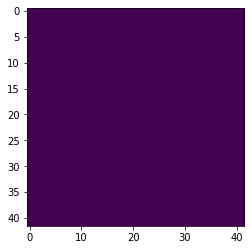

In [64]:
plt.imshow(lists[list(image)[0]])

C:\Users\SUPERMAN\Desktop\hand\image_Sep\val\93\0093_9400.jpg


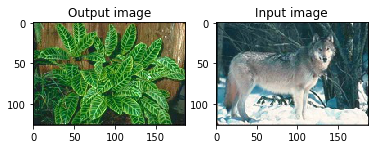

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
%matplotlib inline
value = test_image[0]

path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val"
#path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val\67"
image = "002_201.jpg"
def image_check_output(path, val, image):
    ###HER WE NEED TO GIVE INPUT AS A MANUAL BY SEEING THE Output of the Model
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(6,8))
    #print(fig, ax)
    li = [image for image in os.listdir(path+"\\"+str(val)+"\\") if image.endswith(".jpg")]
    #print(path+"\\"+str(val)+"\\"+li[0])
    img = mpimg.imread(path+"\\"+str(val)+"\\"+li[0])
    #print("Out put image...........")
    ax1.imshow(img)
    ax1.axis("on")
    ax1.title.set_text("Output image")
    
    image_in = mpimg.imread(image)
    #print("Input Image.............", image)
    ax2.imshow(image_in)
    ax2.axis("on")
    ax2.title.set_text("Input image")
    
    return path+"\\"+str(val)+"\\"+li[0]
    
path_img = image_check_output(path, value, image)
print(path_img)

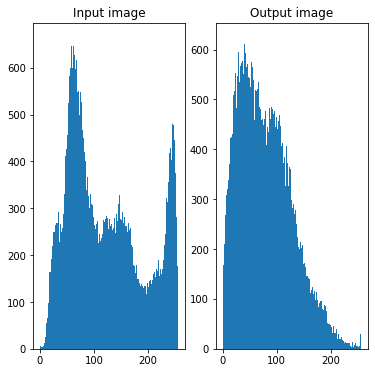

In [40]:
#Histograms for the images 
import cv2
import numpy as np
from matplotlib import pyplot as plt

path = r"C:\Users\SUPERMAN\Desktop\hand\image_Sep\val"
value = test_image[0]

def final_hist(path, val):
    fig,(ax1, ax2)=plt.subplots(1,2,figsize=(6,6))
    
    img = cv2.imread('002_201.jpg',1)
    img1_list = [img.ravel()]
    ax1.hist(img.ravel(),256,[0,256])
    ax1.axis("on")
    ax1.title.set_text("Input image")
    
    li = [image for image in os.listdir(path+"\\"+str(val)+"\\") if image.endswith(".jpg")]
    #print(path+"\\"+str(val)+"\\"+li[0])
    img2 = cv2.imread(path+"\\"+str(val)+"\\"+li[0])
    img_list = [img2.ravel()]
    ax2.hist(img2.ravel(),256,[0,256])
    ax2.axis("on")
    ax2.title.set_text("Output image")
    
    return img_list, img1_list
        
img_list, img1_list = final_hist(path, value)

##Here similarity image calculated by the input and the output of the image and there histograms

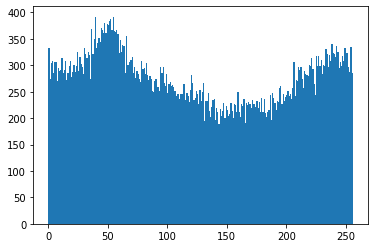

In [41]:
sub_list = []
for i in range(len(img_list)):
    sub_list.append((img_list[i]-img1_list[i]))


plt.hist(sub_list,256,[0,256])
plt.show()

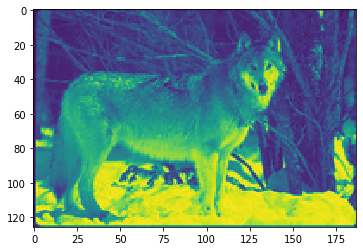

In [42]:
img = cv2.imread("002_201.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

C:\Users\SUPERMAN\Desktop\hand\image_Sep\val\93\0093_9400.jpg


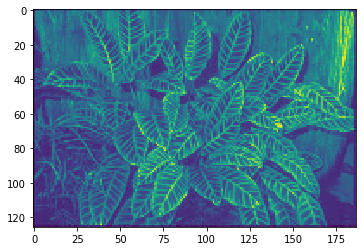

In [47]:

print(path_img)
img2 = cv2.imread(path_img, cv2.IMREAD_GRAYSCALE)
plt.imshow(img2)

# SIFT

In [48]:
sift = cv2.xfeatures2d.SIFT_create()
surf = cv2.xfeatures2d.SURF_create()
orb = cv2.ORB_create(nfeatures=1500)

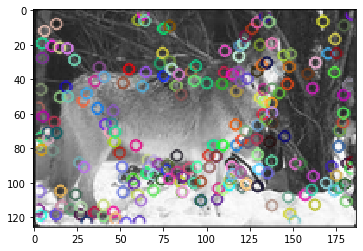

In [49]:
keypoints_sift, descriptors = sift.detectAndCompute(img, None)
img = cv2.drawKeypoints(img, keypoints_sift, None)
plt.imshow(img)

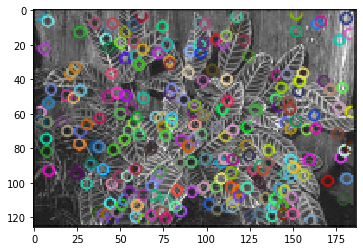

In [50]:
keypoints_sift1, descriptors = sift.detectAndCompute(img2, None)
img2 = cv2.drawKeypoints(img2, keypoints_sift1, None)
plt.imshow(img2)

# SURF

In [51]:
keypoints_surf, descriptors = surf.detectAndCompute(img, None)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)

(523, 32)


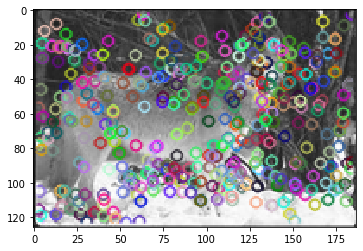

In [52]:
img = cv2.drawKeypoints(img, keypoints_surf, None)
plt.imshow(img)
print(descriptors.shape)

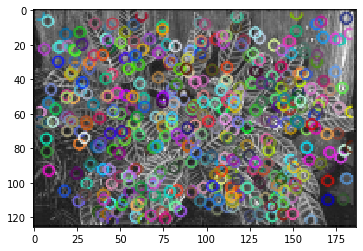

In [53]:
img2 = cv2.drawKeypoints(img2, keypoints_surf, None)
plt.imshow(img2)

# ORD

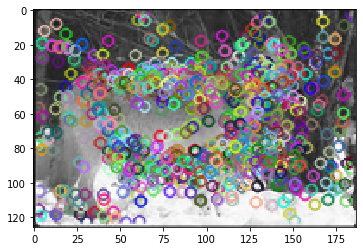

In [54]:
img = cv2.drawKeypoints(img, keypoints_orb, None)
plt.imshow(img)

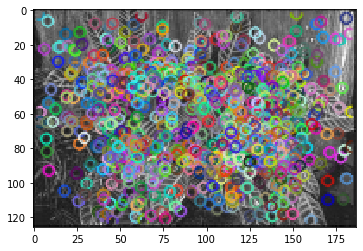

In [55]:
img2 = cv2.drawKeypoints(img2, keypoints_orb, None)
plt.imshow(img2)